# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ler dados
df = pd.read_csv('previsao_de_renda.csv')
df['renda'] = pd.to_numeric(df['renda'], errors='coerce')
df['log_renda'] = np.log(df['renda'].clip(lower=1))

# rótulos 0/1 → 'Não'/'Sim' (sem função)
tmp = df['posse_de_imovel'].astype(str).str.strip().str.lower()
df['posse_de_imovel_lbl'] = tmp.replace({'0':'Não','1':'Sim','nao':'Não','não':'Não','false':'Não','sim':'Sim','true':'Sim'})

tmp = df['posse_de_veiculo'].astype(str).str.strip().str.lower()
df['posse_de_veiculo_lbl'] = tmp.replace({'0':'Não','1':'Sim','nao':'Não','não':'Não','false':'Não','sim':'Sim','true':'Sim'})

# checagem
display(df[['posse_de_imovel_lbl','posse_de_veiculo_lbl','renda','log_renda']].head())

,posse_de_imovel_lbl,posse_de_veiculo_lbl,renda,log_renda
0,Sim,Não,3369.24,8.122442
1,Sim,Sim,6096.14,8.715411
2,Sim,Sim,5658.98,8.640999
3,Não,Sim,7246.69,8.888300
4,Não,Não,4017.37,8.298383


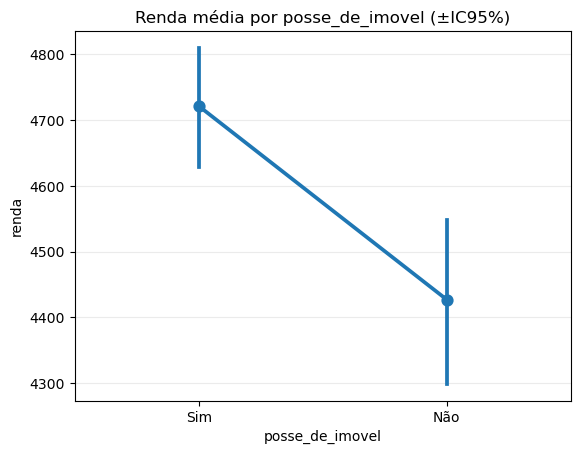

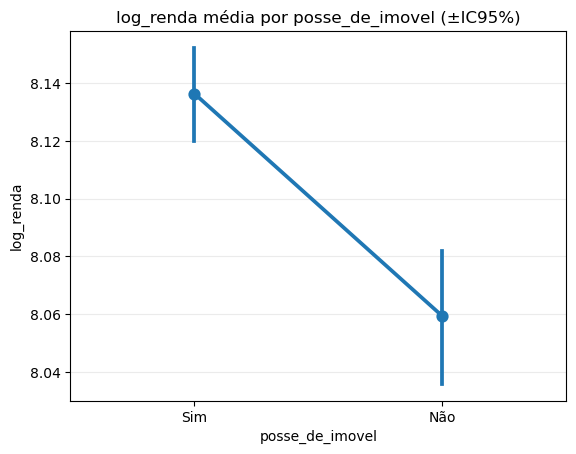

In [6]:
sns.pointplot(x='posse_de_imovel_lbl', y='renda', data=df, errorbar=('ci', 95), dodge=True)
plt.title('Renda média por posse_de_imovel (±IC95%)')
plt.xlabel('posse_de_imovel'); plt.ylabel('renda')
plt.grid(True, axis='y', alpha=0.25); plt.show()

sns.pointplot(x='posse_de_imovel_lbl', y='log_renda', data=df, errorbar=('ci', 95), dodge=True)
plt.title('log_renda média por posse_de_imovel (±IC95%)')
plt.xlabel('posse_de_imovel'); plt.ylabel('log_renda')
plt.grid(True, axis='y', alpha=0.25); plt.show()


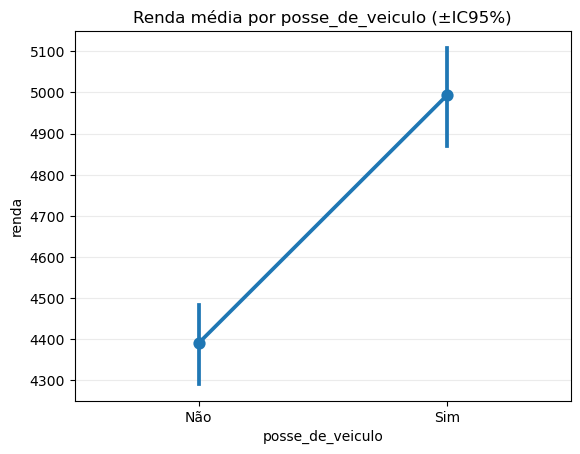

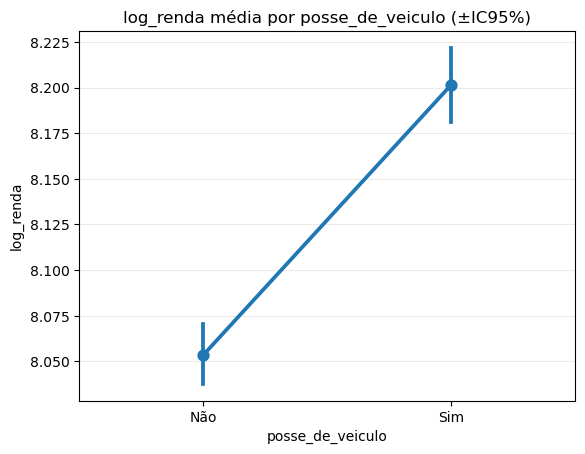

In [7]:
sns.pointplot(x='posse_de_veiculo_lbl', y='renda', data=df, errorbar=('ci', 95), dodge=True)
plt.title('Renda média por posse_de_veiculo (±IC95%)')
plt.xlabel('posse_de_veiculo'); plt.ylabel('renda')
plt.grid(True, axis='y', alpha=0.25); plt.show()

sns.pointplot(x='posse_de_veiculo_lbl', y='log_renda', data=df, errorbar=('ci', 95), dodge=True)
plt.title('log_renda média por posse_de_veiculo (±IC95%)')
plt.xlabel('posse_de_veiculo'); plt.ylabel('log_renda')
plt.grid(True, axis='y', alpha=0.25); plt.show()

Os gráficos de perfis de médias indicam que posse_de_veiculo discrimina a renda de forma mais consistente: o grupo “Sim” apresenta renda média significativamente maior, com IC95% sem sobreposição em relação ao grupo “Não”. Já posse_de_imovel mostra diferença menor e com evidência mais fraca. Assim, entre as variáveis qualitativas avaliadas, posse_de_veiculo é a melhor preditora da renda, enquanto posse_de_imovel agrega pouco sinal adicional.